In [180]:
import os
import cv2
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [181]:
data = pd.read_csv('TrainingData.csv')
data = np.array(data)
m, n = data.shape
print (m,n)
data_train = data.T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train/255.
_,m_train = X_train.shape


8000 785


In [182]:
X_train

array([[0.49019608, 0.76862745, 0.77254902, ..., 0.80392157, 0.52156863,
        0.80392157],
       [0.53333333, 0.77254902, 0.78039216, ..., 0.76470588, 0.52156863,
        0.81568627],
       [0.50980392, 0.76078431, 0.58823529, ..., 0.32941176, 0.51764706,
        0.87843137],
       ...,
       [0.73333333, 0.79607843, 0.71764706, ..., 0.74509804, 0.7254902 ,
        0.57254902],
       [0.76470588, 0.8       , 0.71372549, ..., 0.80392157, 0.6       ,
        0.56470588],
       [0.9254902 , 0.79607843, 0.70980392, ..., 0.79607843, 0.61176471,
        0.55294118]])

In [183]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [184]:



def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50000 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [187]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 1000000)


Iteration:  0
[6 6 6 ... 6 6 6] [0 0 0 ... 9 9 9]
0.101125
Iteration:  50000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.390625
Iteration:  100000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.43675
Iteration:  150000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.459
Iteration:  200000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.47725
Iteration:  250000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.463375
Iteration:  300000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.503625
Iteration:  350000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.518625
Iteration:  400000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.50325
Iteration:  450000
[1 2 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.51425
Iteration:  500000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.505625
Iteration:  550000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.529375
Iteration:  600000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.542875
Iteration:  650000
[1 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.54525
Iteration:  700000
[0 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]
0.526625
Iteration:  750000
[0 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]

In [200]:
data = pd.read_csv('TestingData.csv')
data = np.array(data)
np.random.shuffle(data)
m, n = data.shape
print (m,n)
data_train = data.T
Y_test = data_train[0]
X_test = data_train[1:n]
X_test = X_test/255.
_,m_train = X_test.shape
classes = os.listdir("train") 
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", classes[prediction[0]])
    print("Label: ", classes[label])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

2000 785


Prediction:  marge_simpson
Label:  marge_simpson


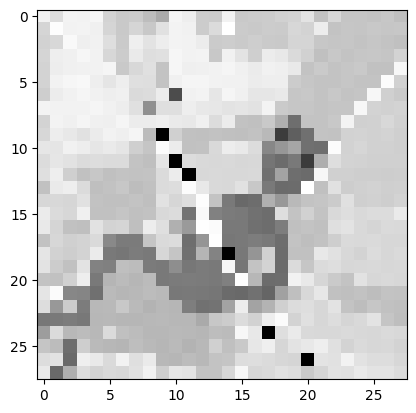

Prediction:  marge_simpson
Label:  marge_simpson


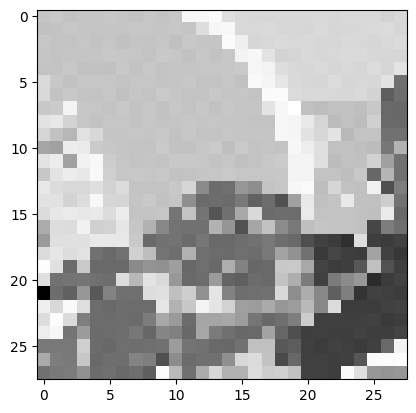

Prediction:  bart_simpson
Label:  bart_simpson


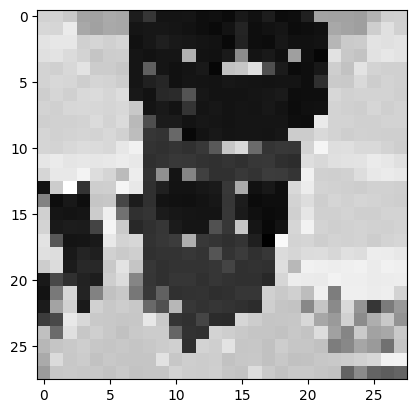

Prediction:  ned_flanders
Label:  ned_flanders


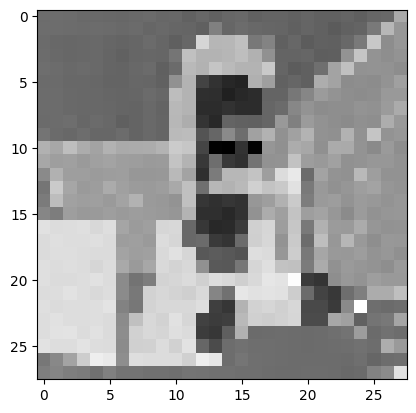

In [201]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


In [199]:

dev_predictions = make_predictions(X_train, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_train)

[0 5 5 ... 5 9 1] [0 0 0 ... 9 9 9]


0.55975